In [8]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

import numpy as np
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from modules.matrices import *
from modules.loss_functions import *

In [2]:
# Target hamiltonian we need to restore
beta = 0.3

theta_h = np.pi/4
phi_h = np.pi/2 


# Jxx = [0]
# Jyy = [0]
# Jzz = [0]

params_t = np.array([[theta_h],
                     [phi_h]])
N_spins = 1
rho_t = density_matr(params_t, beta)
rho_t

array([[0.39700544+0.j        , 0.        +0.10299456j],
       [0.        -0.10299456j, 0.60299456+0.j        ]])

In [12]:
# Main function
def construct(N_iterations, d_max_iter, g_max_iter=1000):
    TD = []
    MSE = []
    params = []
    
    # initiate coefs (couplings and fields) and angles 
    theta_g = np.random.uniform(0, np.pi, N_spins)
    phi_g = np.random.uniform(0, 2*np.pi, N_spins)
    params_g = np.array([theta_g, phi_g])
    rho_g = density_matr(params_g, beta)
    angles = np.zeros((2, N_spins))
    
    MSE.append(mse(spher_to_cartesian(params_t), spher_to_cartesian(params_g)))
    TD.append(g_loss_func(params_g, rho_t, angles))
    
    for _ in range(N_iterations):
        # Find most suitable coefs
        result_g = minimize(g_loss_func,
                          args=(rho_t, angles),
                          x0=params_g.reshape(2*N_spins),
                          method='Nelder-Mead',
                          options={'maxiter':g_max_iter})
        params_g = np.array(result_g.x).reshape(2, N_spins)
        rho_g = density_matr(params_g, beta)
        params.append(params_g)
        # Keep track of errors change
        TD.append(result_g.fun)
        MSE.append(mse(spher_to_cartesian(params_t), spher_to_cartesian(params_g)))
        # Find basis
        result_d = minimize(d_loss_func,
                          args=(rho_g, rho_t),
                          x0=angles.reshape(2*N_spins),
                          method='Nelder-Mead',
                          options={'maxiter':d_max_iter}).x
        angles = result_d.reshape(2, N_spins)

    return MSE, TD, params, angles

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'MSE')

Text(0, 0.5, 'TD')

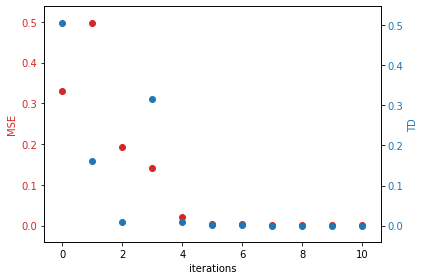

In [13]:
# Run 
np.random.seed(43)  
N_iterations = 10
MSE, TD, params, angles = construct(N_iterations, d_max_iter=1000, g_max_iter=10)

# Plot results
X = range(len(MSE))
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('iterations')
ax1.set_ylabel(f'MSE', color=color)
ax1.scatter(X, MSE, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(f'TD', color=color)  # we've already handled the x-label with ax1
ax2.scatter(X, TD, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [21]:
sum_iter = 1000
iters = [i for i in range(100, 1000, 100)]
MSEs = []

for d in iters:
    MSE, TD, params, angles = construct(N_iterations, d_max_iter=d, g_max_iter=1000-d)
    MSEs.append(MSE)

In [20]:
MSEs

[[1.1243902143882656,
  0.08875752862925412,
  0.20899728009443252,
  0.039331054684747235,
  0.02396699711168565,
  0.04575246668603661,
  0.018358160311232052,
  0.06726114027526887,
  0.013197180139809266,
  0.01695084634426769,
  0.014012301897743851],
 [0.6250035974159113,
  0.7509243974112012,
  0.12433864824179171,
  0.014046989416088057,
  0.0039769090111518674,
  0.015249197940651988,
  0.004395589382422813,
  0.024596005582175343,
  0.002544537323262515,
  0.0008169493230685862,
  0.000959406141808724],
 [0.9934490253204599,
  0.9436801942173253,
  0.19422966609124806,
  0.04380813217063751,
  0.18057705710652683,
  0.021102876405634404,
  0.04414175141009342,
  0.005397019806138686,
  0.015192850740631023,
  0.0018852433553371954,
  0.008548803828797386],
 [0.28379087210184856,
  0.49907099915526104,
  0.14688955429425543,
  0.15847600087409064,
  0.04720256252037828,
  0.02446223114451151,
  0.0031123331342197765,
  0.001670079847910591,
  0.009019776066348226,
  0.00454326

In [60]:
params[-1]

array([[-0.82358831],
       [-1.61046918]])

In [61]:
params_t

array([[0.78539816],
       [1.57079633]])

In [54]:
spher_to_cartesian(params[-1])

array([[0.02043476],
       [0.72783382],
       [0.68544901]])

In [53]:
spher_to_cartesian(params_t)

array([[4.32978028e-17],
       [7.07106781e-01],
       [7.07106781e-01]])